In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
def plot_to_map(size, longitude, latitude) :
    stamen_terrain = cimgt.StamenTerrain()
    
    plt.figure(figsize = size)
    ax = plt.axes(projection = ccrs.Miller())
    
    min_long = longitude.min() - 0.5
    max_long = longitude.max() + 0.5
    min_lat = latitude.min() - 0.5
    max_lat = latitude.max() + 0.5
    ax.set_extent([min_long, max_long, min_lat, max_lat])
    
    #ax.add_image(stamen_terrain, 8)
    ax.add_feature(cfeat.LAND.with_scale('50m'))
    ax.add_feature(cfeat.OCEAN.with_scale('50m'))
    ax.add_feature(cfeat.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeat.BORDERS.with_scale('50m'))
    ax.add_feature(cfeat.RIVERS.with_scale('50m'))
    
    ax.scatter(x = longitude, y = latitude, transform = ccrs.PlateCarree())
    
    return

In [3]:
# Load the data
names = ['TripID', 'MMSI', 'StartLatitude', 'StartLongitude', 'StartTime', 'EndLatitude', 'EndLongitude', 'EndTime',
         'StartPort', 'EndPort', 'ID', 'time', 'shiptype', 'Length', 'Breadth', 'Draught', 'Latitude', 'Longitude',
         'SOG', 'COG', 'TH', 'Destination', 'Name', 'Callsign', 'AisSourcen']
ais = pd.read_csv('rotterdam_hamburg.arff', names = names, skiprows = 27, parse_dates = True, index_col = 'ID',
                  na_values = ['?'], dtype = {'TripID': str, 'MMSI': str, 'shiptype': str})

In [4]:
ais.head()

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,...,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen
ID,,,,,,,,,,,,,,,,,,,,,
39110154,21109,210481000,51.94,4.05,'2016-1-21 04:32',53.53,9.91,'2016-1-22 06:04',ROTTERDAM,HAMBURG,...,10.64,53.95,7.82,14.7,81.0,80.0,HAMBURG,CMA.CGM.SAMBHAR,5BND2,H7001.DAIS1.81b.71.71a
39112959,21109,210481000,51.94,4.05,'2016-1-21 04:32',53.53,9.91,'2016-1-22 06:04',ROTTERDAM,HAMBURG,...,10.64,53.95,7.83,14.7,80.0,80.0,HAMBURG,CMA.CGM.SAMBHAR,5BND2,H7001.DAIS1.81b.71.71a
39118599,21109,210481000,51.94,4.05,'2016-1-21 04:32',53.53,9.91,'2016-1-22 06:04',ROTTERDAM,HAMBURG,...,10.64,53.95,7.83,14.7,81.0,80.0,HAMBURG,CMA.CGM.SAMBHAR,5BND2,H7001.DAIS1.81b.71.71a
39123728,21109,210481000,51.94,4.05,'2016-1-21 04:32',53.53,9.91,'2016-1-22 06:04',ROTTERDAM,HAMBURG,...,10.64,53.95,7.84,14.7,80.0,80.0,HAMBURG,CMA.CGM.SAMBHAR,5BND2,H7001.DAIS1.81b.71.71a
39127583,21109,210481000,51.94,4.05,'2016-1-21 04:32',53.53,9.91,'2016-1-22 06:04',ROTTERDAM,HAMBURG,...,10.64,53.95,7.85,14.7,81.0,80.0,HAMBURG,CMA.CGM.SAMBHAR,5BND2,H7001.DAIS1.81b.71.71a


In [5]:
# Convert time columns to correct dtype
ais['StartTime'] = pd.to_datetime(ais['StartTime'], format = '\'%Y-%m-%d %H:%M\'')
ais['EndTime'] = pd.to_datetime(ais['EndTime'], format = '\'%Y-%m-%d %H:%M\'')
ais['time'] = pd.to_datetime(ais['time'], format = '\'%Y-%m-%d %H:%M\'')

In [6]:
# Convert all headings that are 511 (>= 360) to NaN
bad_th_mask = ais['TH'] >= 360
ais.loc[bad_th_mask, 'TH'] = np.nan

In [7]:
# Convert courses >= 360 to NaN
bad_cog_mask = ais['COG'] >= 360
ais.loc[bad_cog_mask, 'COG'] = np.nan

In [8]:
# Set invalid shiptypes to NaN
# Invalid shiptypes in the data set are '0' and '159'
bad_shiptype_mask = (ais['shiptype'] == '0') | (ais['shiptype'] == '159')
ais.loc[bad_shiptype_mask, 'shiptype'] = np.nan

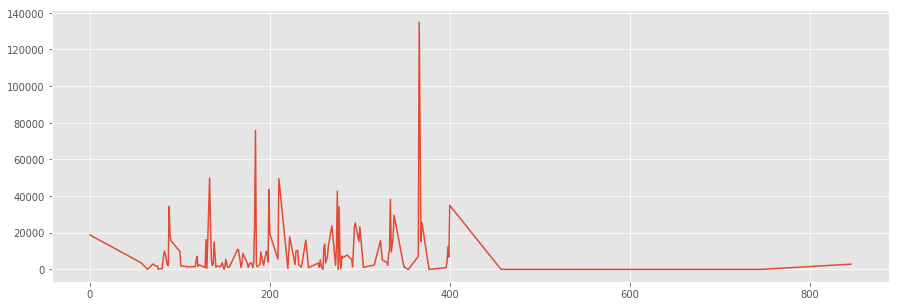

In [9]:
lengths = ais['Length'].value_counts()
plt.figure(figsize = (15, 5))
plt.plot(lengths.sort_index())

In [10]:
# Set invalid lengths (0 or > 400) to NaN
bad_length_mask = (ais['Length'] <= 0) | (ais['Length'] > 400)
ais.loc[bad_length_mask, 'Length'] = np.nan

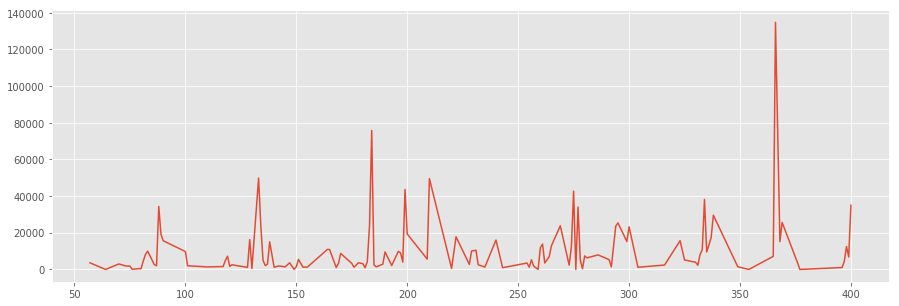

In [11]:
lengths = ais['Length'].value_counts()
plt.figure(figsize = (15, 5))
plt.plot(lengths.sort_index())

In [12]:
# Change index to TripID and time
ais = ais.set_index(['TripID', 'time'])

In [13]:
ais.head()

MMSI  StartLatitude  StartLongitude  \
TripID time                                                            
21109  2016-01-21 22:04:00  210481000          51.94            4.05   
       2016-01-21 22:05:00  210481000          51.94            4.05   
       2016-01-21 22:06:00  210481000          51.94            4.05   
       2016-01-21 22:07:00  210481000          51.94            4.05   
       2016-01-21 22:08:00  210481000          51.94            4.05   

                                     StartTime  EndLatitude  EndLongitude  \
TripID time                                                                 
21109  2016-01-21 22:04:00 2016-01-21 04:32:00        53.53          9.91   
       2016-01-21 22:05:00 2016-01-21 04:32:00        53.53          9.91   
       2016-01-21 22:06:00 2016-01-21 04:32:00        53.53          9.91   
       2016-01-21 22:07:00 2016-01-21 04:32:00        53.53          9.91   
       2016-01-21 22:08:00 2016-01-21 04:32:00        53.53          9.91   

                                       EndTime  StartPort  EndPort shiptype  \
TripID time                                                                   
21109  2016-01-21 22:04:00 2016-01-22 06:04:00  ROTTERDAM  HAMBURG       71   
       2016-01-21 22:05:00 2016-01-22 06:04:00  ROTTERDAM  HAMBURG       71   
       2016-01-21 22:06:00 2016-01-22 06:04:00  ROTTERDAM  HAMBURG       71   
       2016-01-21 22:07:00 2016-01-22 06:04:00  ROTTERDAM  HAMBURG       71   
       2016-01-21 22:08:00 2016-01-22 06:04:00  ROTTERDAM  HAMBURG       71   

                                     ...            Draught  Latitude  \
TripID time                          ...                                
21109  2016-01-21 22:04:00           ...              10.64     53.95   
       2016-01-21 22:05:00           ...              10.64     53.95   
       2016-01-21 22:06:00           ...              10.64     53.95   
       2016-01-21 22:07:00           ...              10.64     53.95   
       2016-01-21 22:08:00           ...              10.64     53.95   

                            Longitude   SOG   COG    TH  Destination  \
TripID time                                                            
21109  2016-01-21 22:04:00       7.82  14.7  81.0  80.0      HAMBURG   
       2016-01-21 22:05:00       7.83  14.7  80.0  80.0      HAMBURG   
       2016-01-21 22:06:00       7.83  14.7  81.0  80.0      HAMBURG   
       2016-01-21 22:07:00       7.84  14.7  80.0  80.0      HAMBURG   
       2016-01-21 22:08:00       7.85  14.7  81.0  80.0      HAMBURG   

                                       Name Callsign              AisSourcen  
TripID time                                                                   
21109  2016-01-21 22:04:00  CMA.CGM.SAMBHAR    5BND2  H7001.DAIS1.81b.71.71a  
       2016-01-21 22:05:00  CMA.CGM.SAMBHAR    5BND2  H7001.DAIS1.81b.71.71a  
       2016-01-21 22:06:00  CMA.CGM.SAMBHAR    5BND2  H7001.DAIS1.81b.71.71a  
       2016-01-21 22:07:00  CMA.CGM.SAMBHAR    5BND2  H7001.DAIS1.81b.71.71a  
       2016-01-21 22:08:00  CMA.CGM.SAMBHAR    5BND2  H7001.DAIS1.81b.71.71a  

[5 rows x 22 columns]

In [15]:
ais = ais.drop(['AisSourcen', 'StartPort', 'EndPort', 'Name', 'MMSI', 'shiptype'], axis = 1)

In [16]:
ais.head()

StartLatitude  StartLongitude           StartTime  \
TripID time                                                                     
21109  2016-01-21 22:04:00          51.94            4.05 2016-01-21 04:32:00   
       2016-01-21 22:05:00          51.94            4.05 2016-01-21 04:32:00   
       2016-01-21 22:06:00          51.94            4.05 2016-01-21 04:32:00   
       2016-01-21 22:07:00          51.94            4.05 2016-01-21 04:32:00   
       2016-01-21 22:08:00          51.94            4.05 2016-01-21 04:32:00   

                            EndLatitude  EndLongitude             EndTime  \
TripID time                                                                 
21109  2016-01-21 22:04:00        53.53          9.91 2016-01-22 06:04:00   
       2016-01-21 22:05:00        53.53          9.91 2016-01-22 06:04:00   
       2016-01-21 22:06:00        53.53          9.91 2016-01-22 06:04:00   
       2016-01-21 22:07:00        53.53          9.91 2016-01-22 06:04:00   
       2016-01-21 22:08:00        53.53          9.91 2016-01-22 06:04:00   

                            Length  Breadth  Draught  Latitude  Longitude  \
TripID time                                                                 
21109  2016-01-21 22:04:00   269.0       32    10.64     53.95       7.82   
       2016-01-21 22:05:00   269.0       32    10.64     53.95       7.83   
       2016-01-21 22:06:00   269.0       32    10.64     53.95       7.83   
       2016-01-21 22:07:00   269.0       32    10.64     53.95       7.84   
       2016-01-21 22:08:00   269.0       32    10.64     53.95       7.85   

                             SOG   COG    TH Destination Callsign  
TripID time                                                        
21109  2016-01-21 22:04:00  14.7  81.0  80.0     HAMBURG    5BND2  
       2016-01-21 22:05:00  14.7  80.0  80.0     HAMBURG    5BND2  
       2016-01-21 22:06:00  14.7  81.0  80.0     HAMBURG    5BND2  
       2016-01-21 22:07:00  14.7  80.0  80.0     HAMBURG    5BND2  
       2016-01-21 22:08:00  14.7  81.0  80.0     HAMBURG    5BND2

Text(0.5,1,u'All Positions Before Filtering')

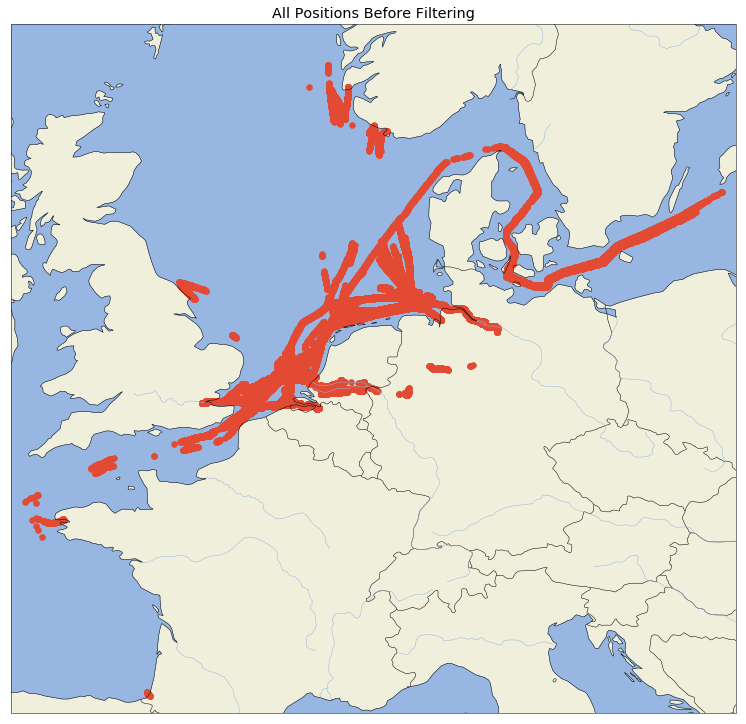

In [17]:
# Plot all positions in the data before any filters are applied
plot_to_map(size = (13, 13), longitude = ais['Longitude'], latitude = ais['Latitude'])
plt.title("All Positions Before Filtering")

Text(0.5,1,u'Start Positions Before Filtering')

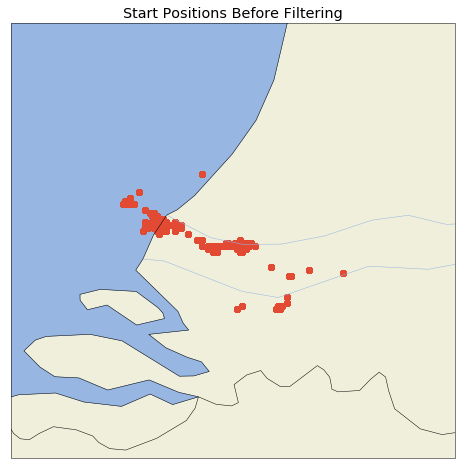

In [18]:
# Plot start positions before any filtering to map
plot_to_map(size = (8, 8), longitude = ais['StartLongitude'], latitude = ais['StartLatitude'])
plt.title("Start Positions Before Filtering")

Text(0.5,1,u'End Positions Before Filtering')

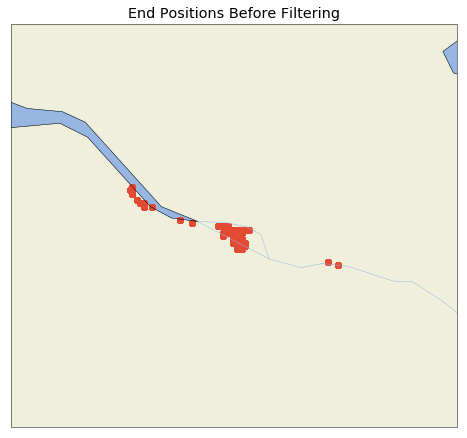

In [19]:
# Plot end positions before any filtering to map
plot_to_map(size = (8, 8), longitude = ais['EndLongitude'], latitude = ais['EndLatitude'])
plt.title("End Positions Before Filtering")

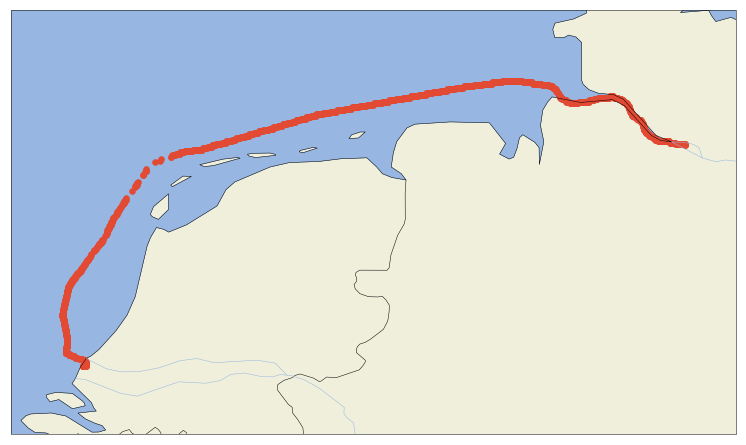

In [20]:
# Plot trip 21109 just for fun
posis = ais.loc['21109', ['Latitude', 'Longitude']]
plot_to_map(size = (13, 13), latitude = posis['Latitude'], longitude = posis['Longitude'])

In [ ]:
# Get rid of trips that leave our zone (2.45 - 10.66 / 51.49 - 55.06)
outside_rec_mask = (ais['Longitude'] < 2.45) | (ais['Longitude'] > 10.66) | (ais['Latitude'] < 51.49) | (ais['Latitude'] > 55.06)
outside_rec_mask.index
#outside_trip_ids = ais['TripID'][outside_rec_mask].unique()
#outside_trip_mask = ~ais['TripID'].isin(outside_trip_ids)
#ais = ais[outside_trip_mask]

In [ ]:
plot_to_map(size = (13, 13), longitude = ais['Longitude'], latitude = ais['Latitude'])
plt.title("All Positions After Filtering to Our Zone")

In [ ]:
ais.head()

In [ ]:
ais['time'].describe()